In [ ]:
# Backtesting out Forex Price Prediction Model that utilizes a basic neural network  

[*********************100%***********************]  1 of 1 completed


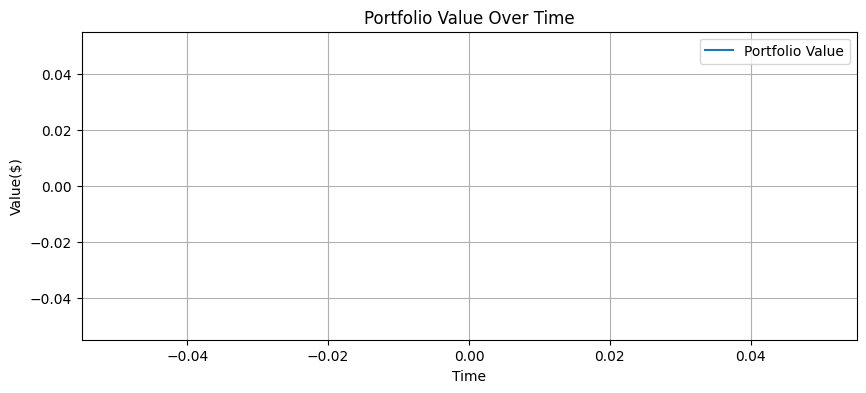

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf

# Download data
df = yf.download("EURUSD=X", start="2024-01-01", end="2025-01-01", interval="1d")
df = df[['Open', 'High', 'Low', 'Close']].dropna().reset_index(drop=True)

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window=period).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

class RSI_strategy:
    def __init__(self, rsi_buy=30, rsi_sell=70):
        self.rsi_buy = rsi_buy
        self.rsi_sell = rsi_sell
        
    def generate_signal(self, row):
        # Corrected: Access the specific value of 'RSI'
        rsi_value = row['RSI']
        if rsi_value < self.rsi_buy:
            return 'BUY'
        elif rsi_value > self.rsi_sell:
            return 'SELL'
        else:
            return 'HOLD'

class Backtester:
    def __init__(self, df, strategy, capital=10000):
        self.df = df
        self.strategy = strategy
        self.cash = capital
        self.position = 0
        self.trades = []
        self.portfolio = []

    def run(self):
        for i, row in self.df.iterrows():
            signal = self.strategy.generate_signal(row)

            if signal == 'BUY' and self.position == 0:
                self.position = self.cash / row['Close']
                self.cash = 0
                self.trades.append(('BUY', i, row['Close']))

            elif signal == 'SELL' and self.position > 0:
                self.cash = self.position * row['Close']
                self.position = 0
                self.trades.append(('SELL', i, row['Close']))

            total_value = self.cash + self.position * row['Close']
            self.portfolio.append(total_value) 

    def summary(self):
        final_value = self.portfolio[-1] 
        returns = (final_value - 10000) / 10000 * 100

        wins = 0
        total = 0

        for i in range(1, len(self.trades)):
            prev_trade = self.trades[i - 1]
            current_trade = self.trades[i]

            if prev_trade[0] == 'BUY' and current_trade[0] == 'SELL':
                total += 1
                if current_trade[2] > prev_trade[2]:
                    wins += 1

        win_rate = (wins / total * 100) if total > 0 else 0

        return {
            'Final Value': round(final_value, 2),
            'Net Return (%)': round(returns, 2),
            'Win Rate (%)': round(win_rate, 2),
            'Trades': self.trades
        }

    def plot(self):
        plt.figure(figsize=(10,4))
        plt.plot(self.portfolio, label='Portfolio Value')
        plt.title('Portfolio Value Over Time')
        plt.xlabel('Time')
        plt.ylabel('Value($)')
        plt.legend()
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    df['EMA'] = df['Close'].ewm(span=10, adjust=False).mean()
    df['RSI'] = compute_rsi(df['Close'], 14)
    df.dropna(inplace=True)
    strategy = RSI_strategy(rsi_buy=30, rsi_sell=70)
    
    backtester = Backtester(df, strategy)
    backtester.plot()
    

In [ ]:
df = pd.read_csv("C:/Users/SOMEN/Downloads/forex_data.csv")
#df.head()


In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf

# Download data
df = yf.download("GBPUSD=X", start="2024-01-01", end="2025-01-01", interval="1d")
df = df[['Open', 'High', 'Low', 'Close']].dropna().reset_index(drop=True)

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0).rolling(window=period).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

class RSI_strategy:
    def __init__(self, rsi_buy=20, rsi_sell=50):
        self.rsi_buy = rsi_buy
        self.rsi_sell = rsi_sell
        
    def generate_signal(self, row):
        rsi_value = row['RSI']
        if pd.isna(rsi_value):
            return 'HOLD'
        if rsi_value < self.rsi_buy:
            return 'BUY'
        elif rsi_value > self.rsi_sell:
            return 'SELL'
        else:
            return 'HOLD'

class Backtester:
    def __init__(self, df, strategy, capital=10000):
        self.df = df
        self.strategy = strategy
        self.cash = capital
        self.position = 0
        self.trades = []
        self.portfolio = []

    def run(self):
        for i, row in self.df.iterrows():
            signal = self.strategy.generate_signal(row)

            if signal == 'BUY' and self.position == 0:
                self.position = self.cash / row['Close']
                self.cash = 0
                self.trades.append(('BUY', i, row['Close']))

            elif signal == 'SELL' and self.position > 0:
                self.cash = self.position * row['Close']
                self.position = 0
                self.trades.append(('SELL', i, row['Close']))
        
            total_value = self.cash + self.position * row['Close']
            self.portfolio.append(total_value) 

    def summary(self):
        if not self.portfolio:
            return {'Final Value': 0, 'Net Return (%)': 0, 'Win Rate (%)': 0, 'Trades': []}
            
        final_value = self.portfolio[-1] 
        returns = (final_value - 10000) / 10000 * 100

        wins = 0
        total = 0

        for i in range(1, len(self.trades)):
            prev_trade = self.trades[i - 1]
            current_trade = self.trades[i]

            if prev_trade[0] == 'BUY' and current_trade[0] == 'SELL':
                total += 1
                if current_trade[2] > prev_trade[2]:
                    wins += 1

        win_rate = (wins / total * 100) if total > 0 else 0

        return {
            'Final Value': round(final_value, 2),
            'Net Return (%)': round(returns, 2),
            'Win Rate (%)': round(win_rate, 2),
            'Trades': self.trades
        }

    def plot(self):
        if not self.portfolio:
            print("No portfolio data to plot")
            return
        plt.figure(figsize=(10,4))
        plt.plot(self.portfolio, label='Portfolio Value')
        plt.title('Portfolio Value Over Time')
        plt.xlabel('Time')
        plt.ylabel('Value($)')
        plt.legend()
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    df['EMA'] = df['Close'].ewm(span=10, adjust=False).mean()
    df['RSI'] = compute_rsi(df['Close'], 14)
    df.dropna(inplace=True)
    strategy = RSI_strategy(rsi_buy=20, rsi_sell=50)
    print(df[['Close', 'RSI']].tail(10))

    backtester = Backtester(df, strategy)
    backtester.summary()
    backtester.plot()
    print("Trade log:", backtester.trades)






[*********************100%***********************]  1 of 1 completed

Price      Close        RSI
Ticker  GBPUSD=X           
252     1.271084  53.728090
253     1.256771  38.659831
254     1.249797  33.939707
255     1.256992  43.315501
256     1.253447  39.760557
257     1.253604  37.441130
258     1.254375  32.238111
259     1.252976  32.029609
260     1.257881  37.093673
261     1.254910  32.462287
No portfolio data to plot
Trade log: []


In [ ]:
if __name__ == "__main__":
    df['EMA'] = df['Close'].ewm(span=10, adjust=False).mean()
    df['RSI'] = compute_rsi(df['Close'], 14)
    df.dropna(inplace=True)
    strategy = RSI_strategy(rsi_buy=20, rsi_sell=50)
    print(df[['Close', 'RSI']].tail(10))

    backtester = Backtester(df, strategy)
    backtester.summary()
    backtester.plot()
    print("Trade log:", backtester.trades)




